### TODO

* Cache calibration results, so that the program calling the calibration routines below do not recompute calibration every time. 

Finding corners in calibration image 0
... found

Finding corners in calibration image 1
... found

Finding corners in calibration image 2
... found

Finding corners in calibration image 3
    ... unsuccessful

Finding corners in calibration image 4
... found

Finding corners in calibration image 5
... found

Finding corners in calibration image 6
... found

Finding corners in calibration image 7
    ... unsuccessful

Finding corners in calibration image 8
... found

Finding corners in calibration image 9
... found

Finding corners in calibration image 10
... found

Finding corners in calibration image 11
... found

Finding corners in calibration image 12
... found

Finding corners in calibration image 13
... found

Finding corners in calibration image 14
... found

Finding corners in calibration image 15
    ... unsuccessful

Finding corners in calibration image 16
... found

Finding corners in calibration image 17
... found

Finding corners in calibration image 18
... found

Finding 

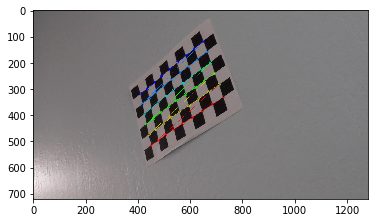

In [59]:
import os.path, glob
import numpy as np
import cv2
import pickle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


def calibrate_camera(use_calib_cache=True, save_to_pickle_file=True):
    
    filename_calib_results = "./camera_cal/calibration_results.p"
    if use_calib_cache is True:
        if os.path.exists(filename_calib_results):
            print("Using already available cached calibration results.")
            print()
            ret, mtx, dist, rvecs, tvecs = pickle.load( open(filename_calib_results, "rb" ) )
            return mtx, dist
    
    nx = 9
    ny = 6

    dir_calib_images = './camera_cal/'
    img_filenames = glob.glob(os.path.join(dir_calib_images, 'calibration*.jpg'))

    imgs_calib= []
    for img_filename in img_filenames:
        imgs_calib.append(cv2.imread(img_filename))

    # 3D real-world points and the corresponding 2D image points
    objpoints, imgpoints = [], []

    # 3D points
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

    gray = None
    for idx, img in enumerate(imgs_calib):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # plt.imshow(gray, cmap='gray')

        print("Finding corners in calibration image {}".format(idx))
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            print("... found")

            # Draw and display the corners
            img_orig = []
            img_orig = img.copy()
            img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            plt.imshow(img, cmap='gray')

            objpoints.append(objp)
            imgpoints.append(corners)                
        else:
            print("    ... unsuccessful")

        print()

    print("Calibrating camera ...")
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    if save_to_pickle_file is True:
        pickle.dump([ret, mtx, dist, rvecs, tvecs], open( filename_calib_results, "wb" ) )
    
    return mtx, dist


mtx, dist = calibrate_camera(use_calib_cache=False)
print("mtx: {}".format(mtx))
print()
print("dist: {}".format(dist))

Using already available cached calibration results.

mtx: [[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]

dist: [[ -2.41017956e-01  -5.30721171e-02  -1.15810354e-03  -1.28318858e-04
    2.67125300e-02]]


True

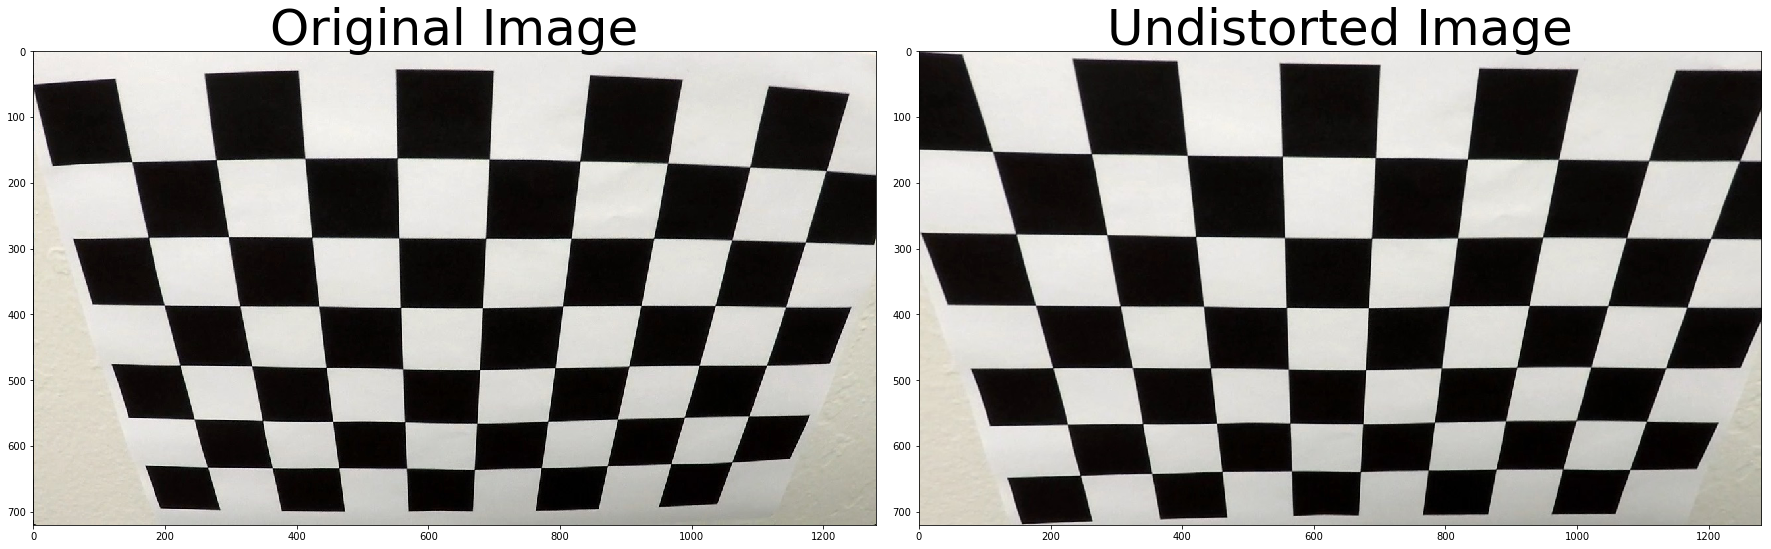

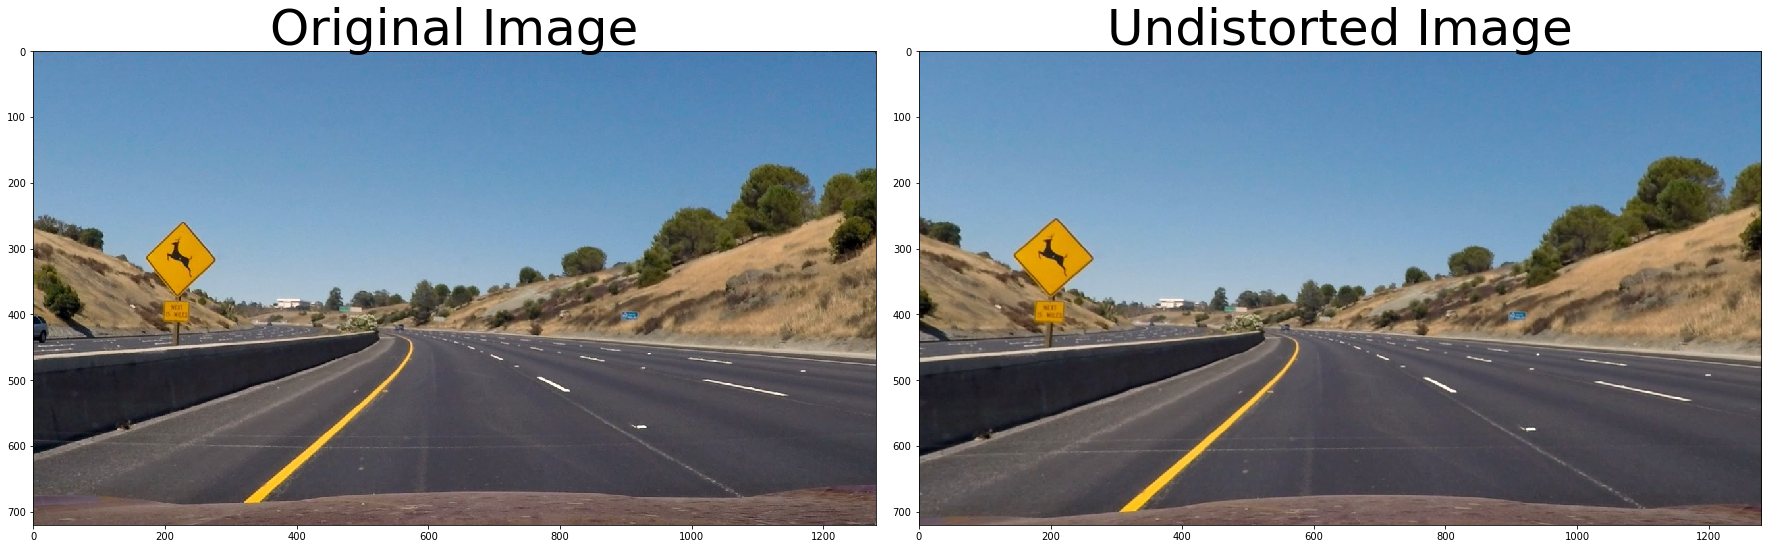

In [60]:
def undistort_image(img, mtx, dist, plot_images=True):
    img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    
    if plot_images is True:
        f2, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f2.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(img_undistorted)
        ax2.set_title('Undistorted Image', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    return img_undistorted

# Calibrate camera
mtx, dist = calibrate_camera(use_calib_cache=True)
print("mtx: {}".format(mtx))
print()
print("dist: {}".format(dist))

# Undistort a calibration image
img_calib = cv2.cvtColor(cv2.imread('./camera_cal/calibration2.jpg'), cv2.COLOR_BGR2RGB)
img_undistorted = undistort_image(img_calib, mtx, dist, plot_images=True)

cv2.imwrite('output_images/img_distorted_calib.jpg', img_calib)
cv2.imwrite('output_images/img_undistorted_calib.jpg', img_undistorted)

# Undistort a test image
img_test = cv2.cvtColor(cv2.imread('./test_images/test2.jpg'), cv2.COLOR_BGR2RGB)
img_undistorted = undistort_image(img_test, mtx, dist, plot_images=True)

cv2.imwrite('output_images/img_distorted_test.jpg', img_test)
cv2.imwrite('output_images/img_undistorted_test.jpg', img_undistorted)


# plt.close()